# Clasificacion con Logistic Regression

En este tutorial, construiras uel clasificador mas simple de ML utilizando Scikit-learn. Los pasos en este tutorial te facilitaran el proceso de trabajar con tus propios datos en Python. En esta parte se va mostrar como se usa sklearn minimamente para predecir una clasificacion.

El set de datos de la flor de Iris es un set multivariable introducido por Ronald Fisher , el cual uso múltiples mediciones en problemas taxonómicos como un ejemplo de análisis discriminante lineal.

In [50]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X, y = load_iris(return_X_y=True)
print(X.shape)
print(y.shape)
modelLR = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X, y)
modelLR.predict(X[:2, :])

modelLR.predict_proba(X[:2, :]) 

modelLR.score(X, y)

(150, 4)
(150,)


0.9733333333333334

A partir de la información dada en el conjunto de datos de cáncer de mama, debemos clasificar si se trata de un cáncer maligno o benigno.

In [51]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

X, y = load_breast_cancer(return_X_y=True)
print(X.shape)
print(y.shape)
modelLR = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X, y)
modelLR.predict(X[:2, :])

modelLR.predict_proba(X[:2, :]) 

modelLR.score(X, y)

(569, 30)
(569,)


0.9472759226713533

# Clasificacion de Frutas
El set de datos de frutas fue creado por  Murray et al.. Veamos las primeras filas de los datos.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


# Cargar el Drive helper y mount
from google.colab import drive

# Link y Codigo de autorizacion.
drive.mount('/content/drive_all')

# Cargar datos del google drive
#frutas = pd.read_csv('/content/drive_all/My Drive/dataset/fruit_data.txt')

frutas = pd.read_table('/content/drive_all/My Drive/dataset/fruit_data.txt')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive_all


Cuantas frutas y caracteristicas tiene la data 

In [24]:

print(frutas.shape)
print(frutas.size)
print(frutas.ndim)
frutas.sample(5)
frutas.head()

(59, 7)
413
2


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


#Graficamente usando seaborn

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



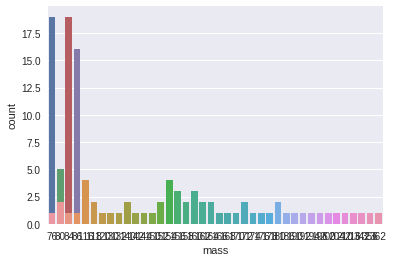

In [76]:
print(frutas.groupby('fruit_name').size())

import seaborn as sns
sns.countplot(frutas['mass'],label="Count")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



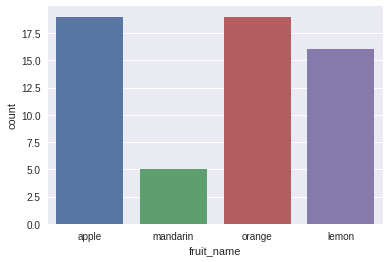

In [77]:
sns.countplot(frutas['fruit_name'],label="Count")
plt.show()

In [78]:
%%% fruit_label 	fruit_name 	fruit_subtype 	mass 	width 	height 	color_score

UsageError: Cell magic `%%` not found.


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



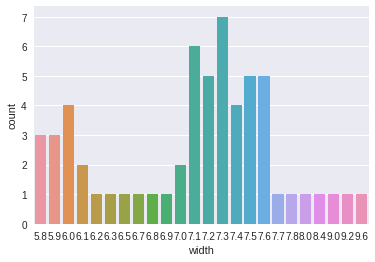

In [81]:
sns.countplot(frutas['width'],label="Count")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


Text(0.5,0.98,'Scatter-matrix para cada entrada')

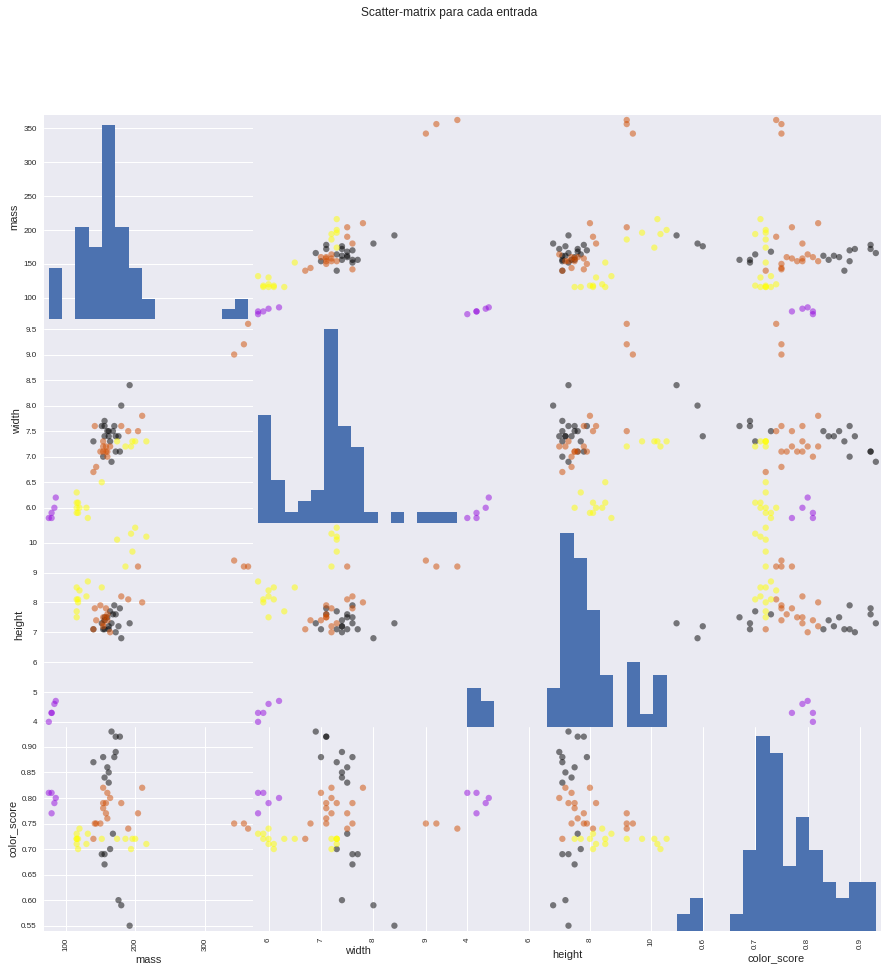

In [34]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

feature_names = ['mass', 'width', 'height', 'color_score']
X = frutas[feature_names]
y = frutas['fruit_label']

#cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(15,15), cmap = cmap)
plt.suptitle('Scatter-matrix para cada entrada')


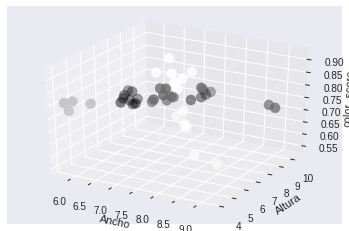

In [62]:
# ploteando un scatter en 3D 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('Ancho')
ax.set_ylabel('Altura')
ax.set_zlabel('color_score')
plt.show()

In [0]:
#Normalizando la data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Precision del clasificador LDA en el set de entrenamiento:', logreg.score(X_train, y_train))
print('Precision del clasificador LDA en el set de prueba:', logreg.score(X_test, y_test))

Precision del clasificador LDA en el set de entrenamiento: 1.0
Precision del clasificador LDA en el set de prueba: 1.0


In [84]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Precision del clasificador LDA en el set de entrenamiento:', lda.score(X_train, y_train))
print('Precision del clasificador LDA en el set de prueba:', lda.score(X_test, y_test))

Precision del clasificador LDA en el set de entrenamiento: 0.997946611909651
Precision del clasificador LDA en el set de prueba: 0.9938650306748467


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning:

Variables are collinear.



#Clasificacion del cancer

En este tutorial, construiras un clasificador de ML utilizando Scikit-learn. Los pasos en este tutorial deberían ayudarlo a facilitar el proceso de trabajar con sus propios datos en Python.

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [87]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly
import plotly.graph_objs as go
 
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()

data.keys()

# Opcinalmente puedes llamarlo desde sus nombres de defecto
print("\n",data['target_names'])
print("\n", data['target'])
print("\n",data['feature_names'])
print("\n",data['data'])

# Look at our data




 ['malignant' 'benign']

 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 

In [88]:
from sklearn.linear_model import LogisticRegression
  
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

# Inicializar el clasificador
model = LogisticRegression()
# entrenar el modelo
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [89]:
# Hacer predicciones
preds = model.predict(X_test[:2, :])

model.predict_proba(X[:2, :]) 

model.score(X, y)

0.9543057996485061

#Visualización de Clasificadores : Reduccion de dimensiones con PCA

El propósito de este cuaderno es permitirte visualizar varios límites de decisión de los clasificadores.

Los datos utilizados en este cuaderno se basan en el ( http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io ) almacenado en mushrooms.csv.

Para poder visualizar mejor los límites de decisión, realizaremos el Análisis de componentes principales (PCA) en los datos para reducir la dimensionalidad a 2 dimensiones. La reducción de la dimensionalidad se tratará mas adelante en el curso.

¡Cambia los diferentes parámetros para ver cómo afectan la precisión y el límite de decisión del clasificador!

Mounted at /content/drive_all


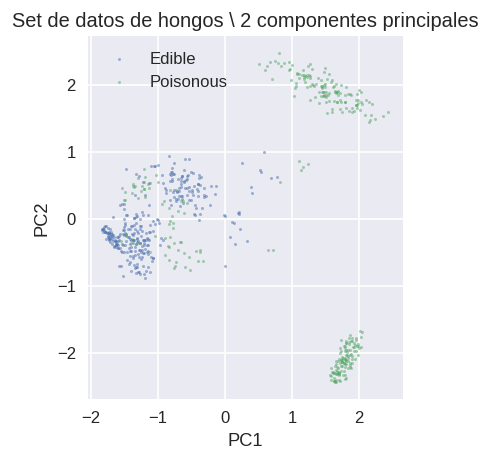

In [75]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


# Cargar el Drive helper y mount
from google.colab import drive

# Link y Codigo de autorizacion.
drive.mount('/content/drive_all')

# Cargar datos del google drive
df = pd.read_csv('/content/drive_all/My Drive/dataset/mushrooms.csv')

#df = pd.read_csv('mushrooms.csv')
df2 = pd.get_dummies(df)

df3 = df2.sample(frac=0.08)

X = df3.iloc[:,2:]
y = df3.iloc[:,1]


pca = PCA(n_components=2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)


plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='Edible', s=2)
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='Poisonous', s=2)
plt.legend()
plt.title('Set de datos de hongos \ 2 componentes principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

In [0]:
def plot_mushroom_boundary(X, y, fitted_model):

    plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)

        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.4, label='Edible', s=5)
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.4, label='Posionous', s=5)
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)
    plt.show

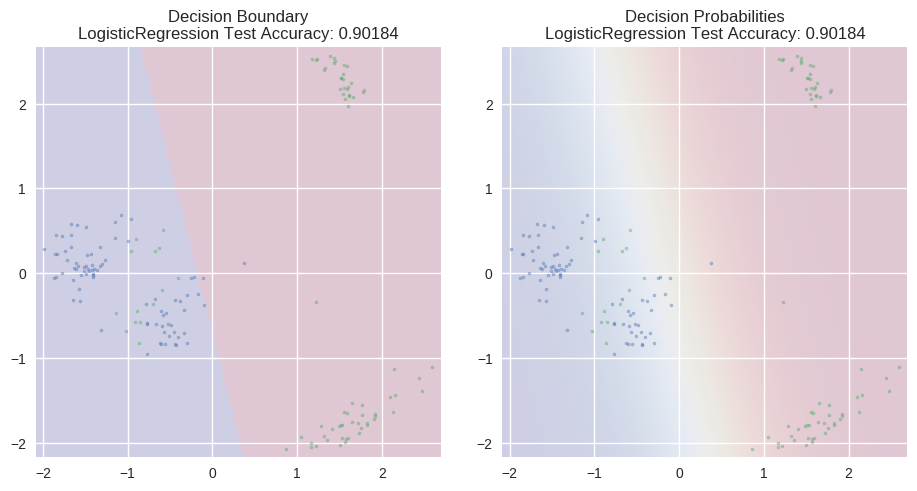

In [74]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)
